# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** 
$ \\ \mathbb{E}X_{(n)} = \frac{\theta n}{n+1} \Rightarrow смещенная\\
 \mathbb{E}\frac{n+1}{n}X_{(n)} = \theta \Rightarrow несмещенная \\
 \mathbb{E}2\overline{X} = \theta \Rightarrow несмещенная $ 

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [1]:
import numpy as np
import scipy
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate

%matplotlib inline

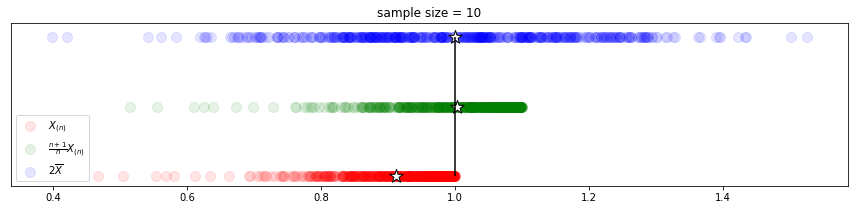

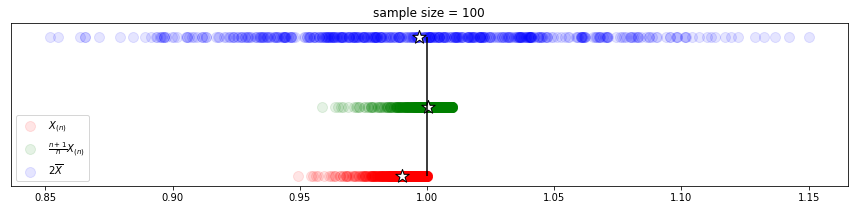

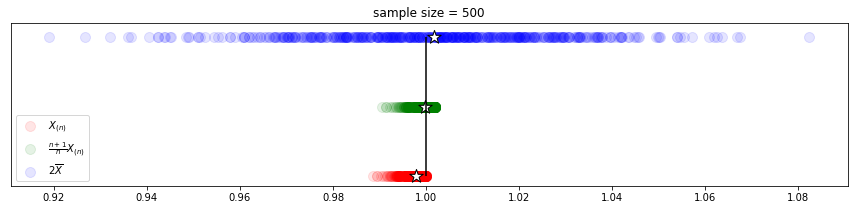

In [113]:
a = ['$X_{(n)}$','$\\frac{n+1}{n}X_{(n)}$','$2\overline{X}$'] # для метки второй оценки \frac не выводился корректно
colors = ['red','green','blue']
size = [10,100,500]

for siz in size:
    plt.figure(figsize = (15,3))
    samples = sps.uniform().rvs((500,siz))
    sample = np.array([samples.max(axis = 1),(siz + 1)/siz * samples.max(axis = 1), 2 * samples.mean(axis = 1)])
    for i in (0,1,2):
        plt.scatter(sample[i], np.zeros_like(sample[i]) + i, 
                    alpha=0.1, s=100, color=colors[i], label=a[i])
        plt.scatter(sample[i].mean(), i, marker='*', s=200, 
                    color='w', edgecolors='black')
    #Для всего графика:
    plt.vlines(1, 0, 2, color='black')
    plt.title('sample size = %d' % siz)
    plt.yticks([])
    plt.legend()
    plt.show()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** 
$\mathbb{E}S^2 = \frac{(n-1)\sigma^2}{n} \Rightarrow смещенная \\
\mathbb{E}\frac{n}{n-1}S^2 = \sigma^2 \Rightarrow несмещенная$


Для данной модели выполните те же действия, что и с предыдущей.

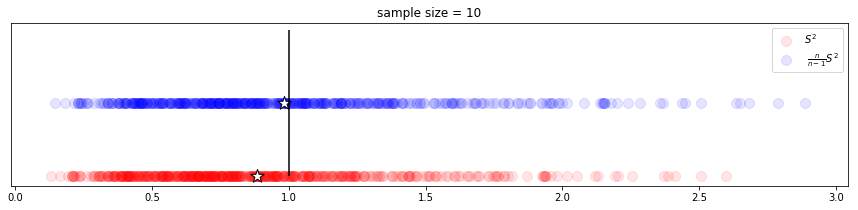

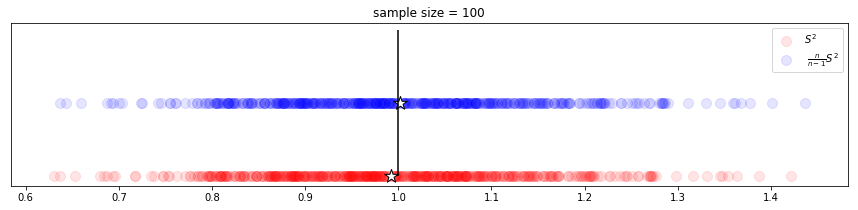

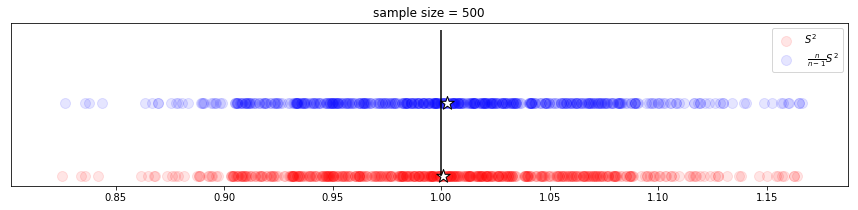

In [114]:
a = ['$S^2$',' $\\frac{n}{n-1}S^2$'] # для метки второй оценки \frac не выводился корректно
colors = ['red','blue']
size = [10,100,500]

for siz in size:
    plt.figure(figsize = (15,3))
    samples = sps.norm().rvs((500,siz))
    Xmean2 = samples.mean(axis = 1) ** 2
    X2mean = (samples**2).mean(axis = 1)
    sample = np.array([X2mean - Xmean2, siz/(siz-1) * (X2mean - Xmean2)])
    for i in (0,1):
        plt.scatter(sample[i], np.zeros_like(sample[i]) + i, 
                    alpha=0.1, s=100, color=colors[i], label=a[i])
        plt.scatter(sample[i].mean(), i, marker='*', s=200, 
                    color='w', edgecolors='black')
    #Для всего графика:
    plt.vlines(1, 0, 2, color='black')
    plt.title('sample size = %d' % siz)
    plt.yticks([])
    plt.legend()
    plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 
Несмещенность - свойство, означающее, что при многократном использовании оценка в среднем точна.
Экмперименты подтверждают это.
На графиках видно что при малых значения n вторая оценка значительно точнее. Поэтому в лабораторных работах среднеквадратичное отклонение считается с $n-1$ в знаменателе. 

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

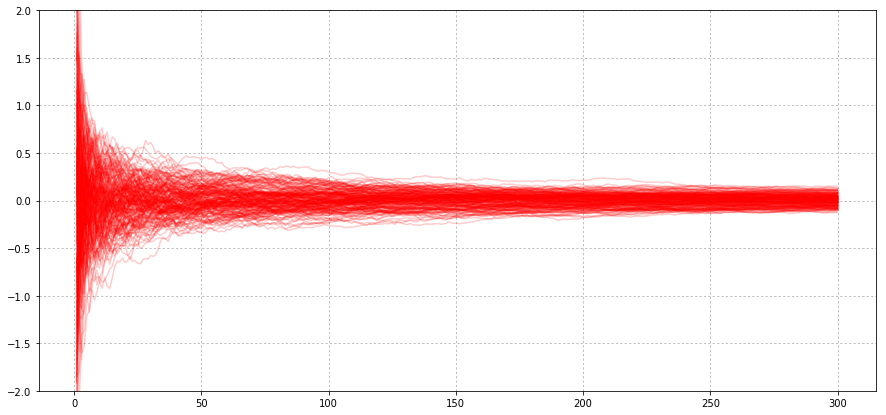

In [115]:
'''
Пункт а
'''
size = (200,300)
samples = sps.norm().rvs(size)

def cumavg(X):
    return scipy.cumsum(X) / np.arange(1, len(X) + 1, 1)

plt.figure(figsize = (15,7))
for i in np.arange(0,size[0]):
    plt.plot(np.arange(1,size[1]+1), cumavg(samples[i]), color = "red", alpha = 0.2)
plt.ylim(-2,2)
plt.grid(ls=':')
plt.show()

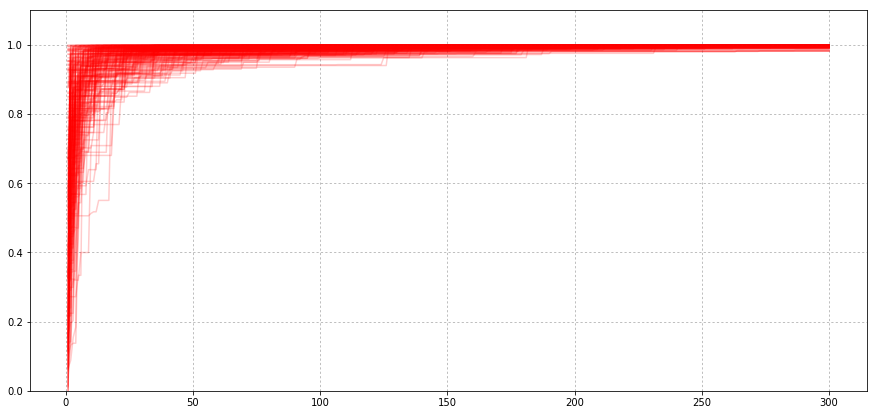

In [116]:
'''
Пункт b
'''
size = (200,300)
samples = sps.uniform().rvs(size)

plt.figure(figsize = (15,7))
for i in np.arange(0,size[0]):
    plt.plot(np.arange(1,size[1]+1), np.maximum.accumulate(samples[i]), color = "red", alpha = 0.2)
plt.ylim(0,1.1)
plt.grid(ls=':')
plt.show()

**Вывод:** 
Состоятельность - свойство, означающее, что последовательность оценок стремится к параметру при увеличении размера выборки.
Эксперименты подтверждают свойства.
Результаты пункта а) связаны с ЗБЧ следующим образом. По ЗБЧ: $$\frac{1}{n}\sum \limits_{i=1}^{n}X_i \overset{P}{\rightarrow} 
\mathbb{E}X_1  = \theta$$ То есть $\frac{1}{n}\sum \limits_{i=1}^{n}X_i$ удовлетворяет определению состоятельной оценки. 



**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

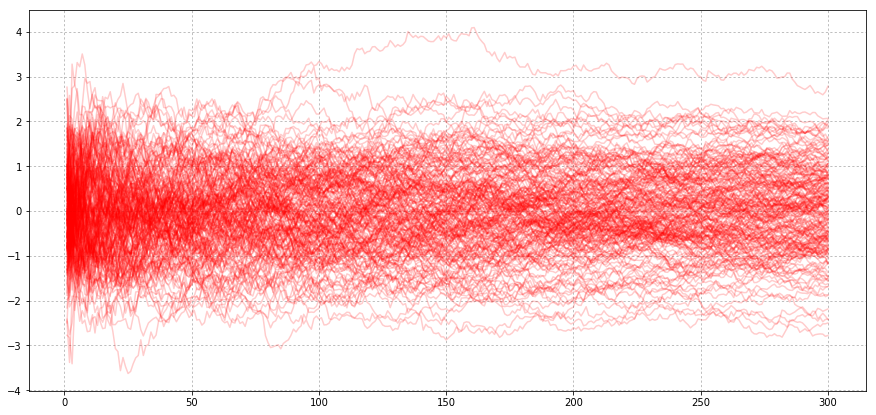

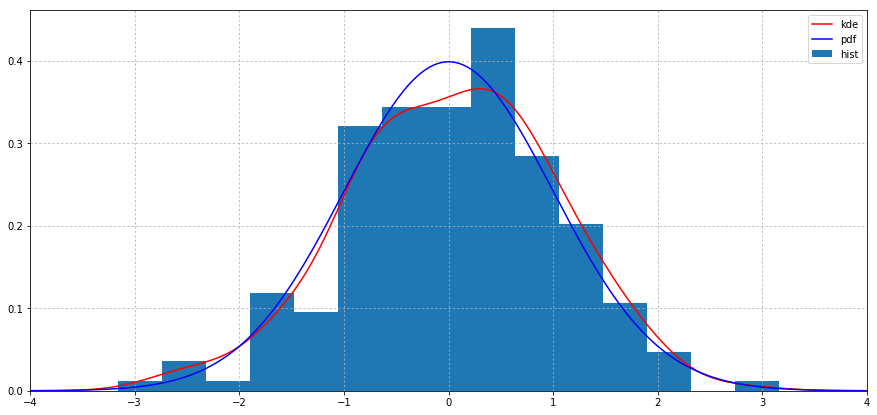

In [117]:
'''
Пункт a
Построение T(jn)
'''
size = (200,300)
samples = sps.norm().rvs(size)

def sqrtavg(X):
    return scipy.cumsum(X) / np.sqrt(np.arange(1, len(X) + 1, 1))

plt.figure(figsize = (15,7))
for i in np.arange(0,size[0]):
    plt.plot(np.arange(1,size[1]+1), sqrtavg(samples[i]), color = "red", alpha = 0.2)
plt.grid(ls=':')
plt.show()

'''
Построение гистограммы и ядерной оценки плотности
'''
plt.figure(figsize = (15,7))
T300 = samples @ (np.ones(300)/np.sqrt(300))

plt.hist(T300, np.linspace(-4,4,20), normed=True, label = "hist")

grid = np.linspace(-4,4,200)
kernel_density = KDEUnivariate(T300)
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='red', label='kde')

plt.plot(grid, sps.norm().pdf(grid), color = "blue", label = "pdf")

plt.legend()
plt.xlim(-4,4)
plt.grid(ls=':')
plt.show()

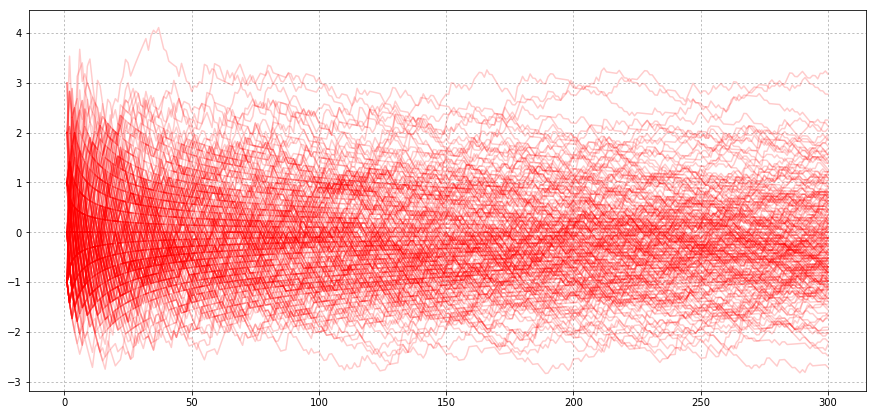

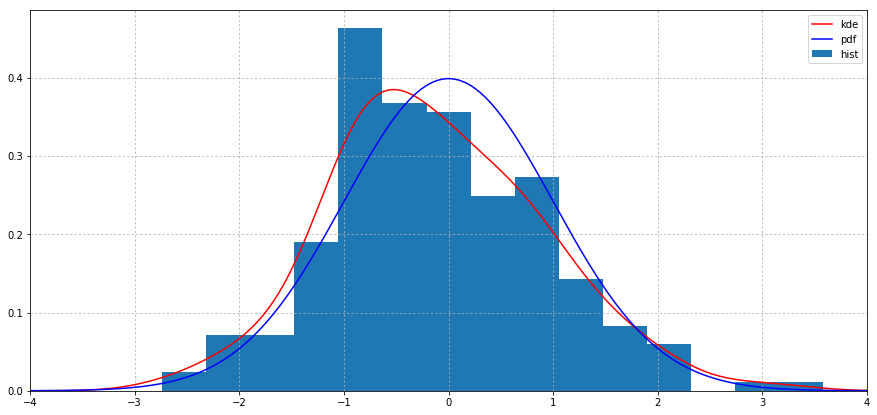

In [118]:
'''
Пункт b
Построение T(jn)
'''
size = (200,300)
samples = sps.poisson(1).rvs(size)

def sqrtavg(X, param):
    return (scipy.cumsum(X) / np.arange(1, len(X) + 1) - param) * np.sqrt(np.arange(1, len(X) + 1))

plt.figure(figsize = (15,7))
for i in np.arange(0,size[0]):
    plt.plot(np.arange(1,size[1]+1), sqrtavg(samples[i], 1), color = "red", alpha = 0.2) 
plt.grid(ls=':')
plt.show()

'''
Построение гистограммы и ядерной оценки плотности
'''
plt.figure(figsize = (15,7))
T300 = (samples @ np.ones(300)/300 - 1) * np.sqrt(300)

plt.hist(T300, np.linspace(-4,4,20), normed=True, label = "hist")

grid = np.linspace(-4,4,200)
kernel_density = KDEUnivariate(T300)
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='red', label='kde')
plt.plot(grid, sps.norm().pdf(grid), color = "blue", label = "pdf")
plt.legend()
plt.xlim(-4,4)
plt.grid(ls=':')
plt.show()

**Вывод:** Асимптотическая нормальность - свойство, означающее, что при $n \rightarrow \infty$ распределение оценок стремиться к нормальному распределению с мат.ожиданием $\theta$. То есть оценка параметра производится с какой-то известной погрешностью.

По ЦПТ: $$\sqrt{n} (\overline{X} - \mathbb{E}X ) \overset{d}{\rightarrow} \xi \sim \mathcal{N}(0,\mathbb{D}X)$$ $\mathbb{D}X = 1$, a $\mathbb{E}X = \theta$, поэтому $$\sqrt{n}(\overline{X} - \theta) \overset{d}{\rightarrow} \xi \sim \mathcal{N}(0,1)$$ Значит $\overline{X}$ - асимптотически нормальная оценка.


**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

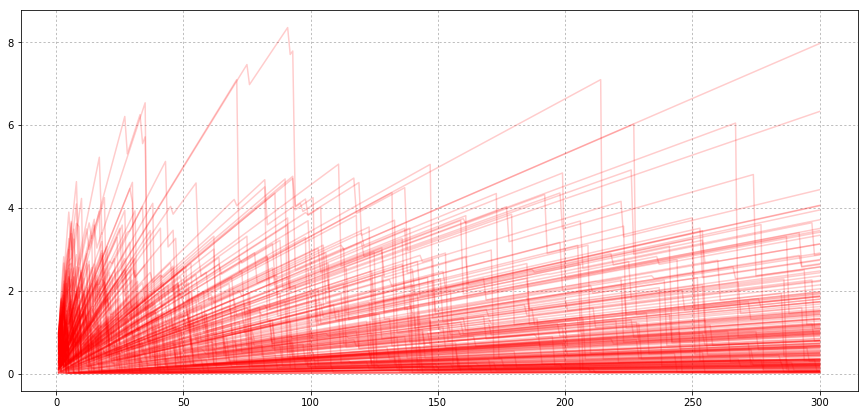

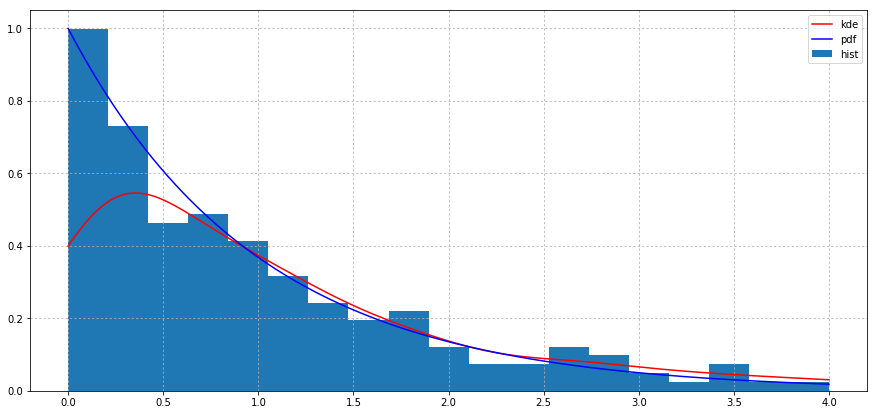

In [119]:
'''
Построение T(jn)
'''
size = (200,300)
samples = sps.uniform().rvs(size)

def func(X, param):
    cummax = np.zeros(X.size)
    cummax[0] = X[0]
    for i in range(1, X.size):
        cummax[i] = max(cummax[i-1], X[i])
    return (param - cummax) * np.arange(1, X.size + 1)

plt.figure(figsize = (15,7))
for i in np.arange(0,size[0]):
    plt.plot(np.arange(1,size[1]+1), func(samples[i], 1), color = "red", alpha = 0.2) 
plt.grid(ls=':')
plt.show()

'''
Построение гистограммы и ядерной оценки плотности
'''
plt.figure(figsize = (15,7))
T300 = (1 - samples.max(axis = 1)) * 300

plt.hist(T300, np.linspace(0,4,20), normed=True, label = "hist")

grid = np.linspace(0,4,200)
kernel_density = KDEUnivariate(T300)
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='red', label='kde')
plt.plot(grid, sps.expon().pdf(grid), color = "blue", label = "pdf")
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** Эксперимент подтверждает тоеретическое предположение.

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [120]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)
        if sample.size == 3:
            likelihood = density_function(sample[0])*density_function(sample[1])*density_function(sample[2])
        else:
            likelihood = density_function(sample[0])*density_function(sample[1])

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

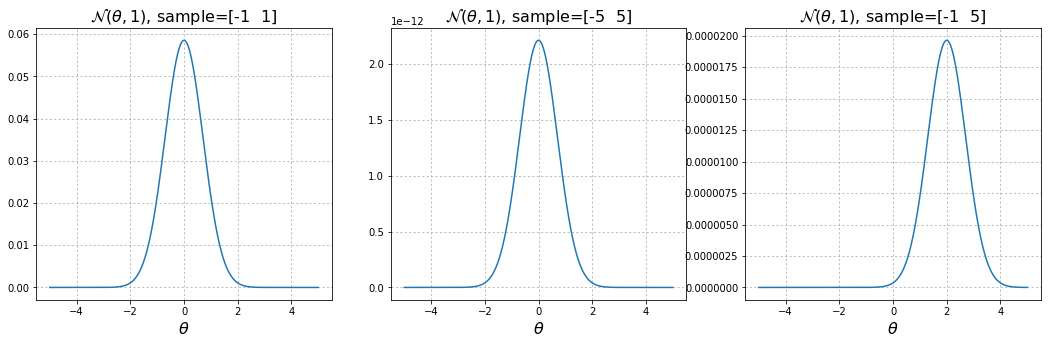

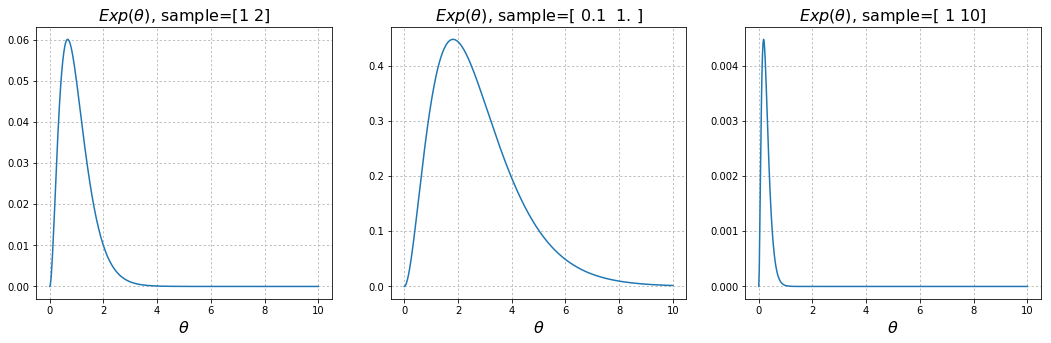

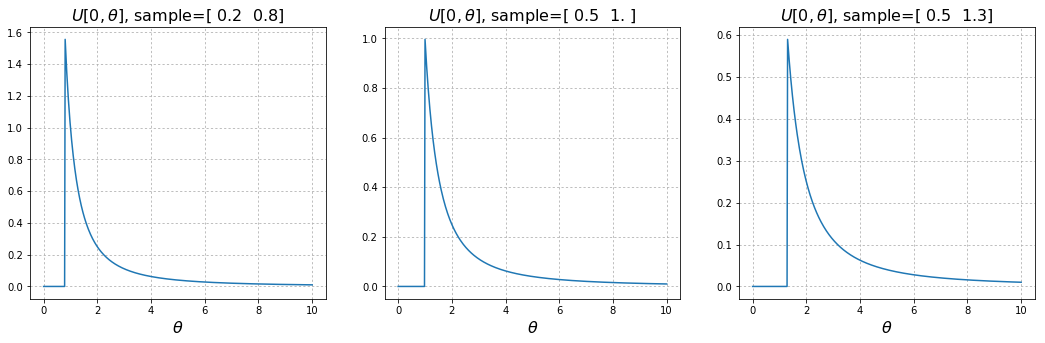

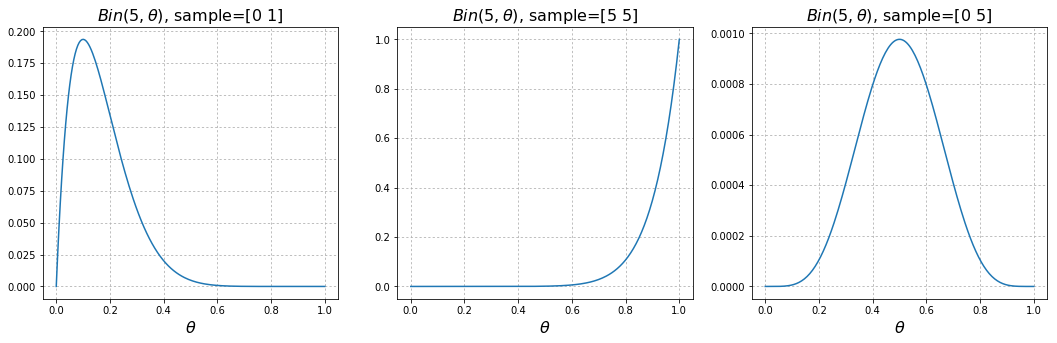

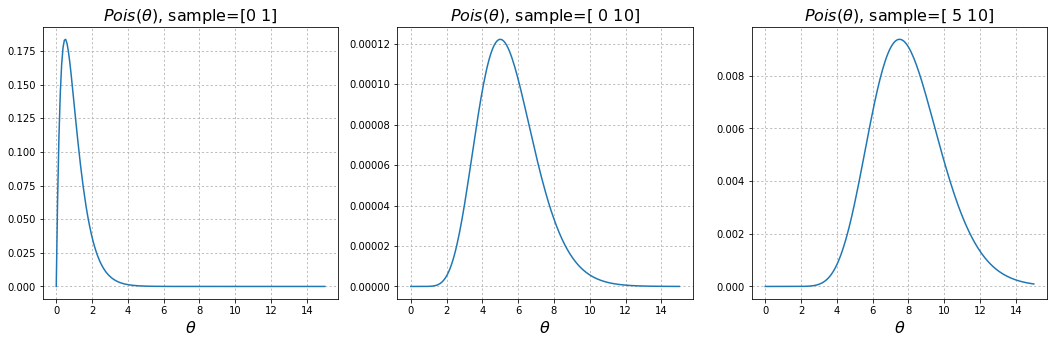

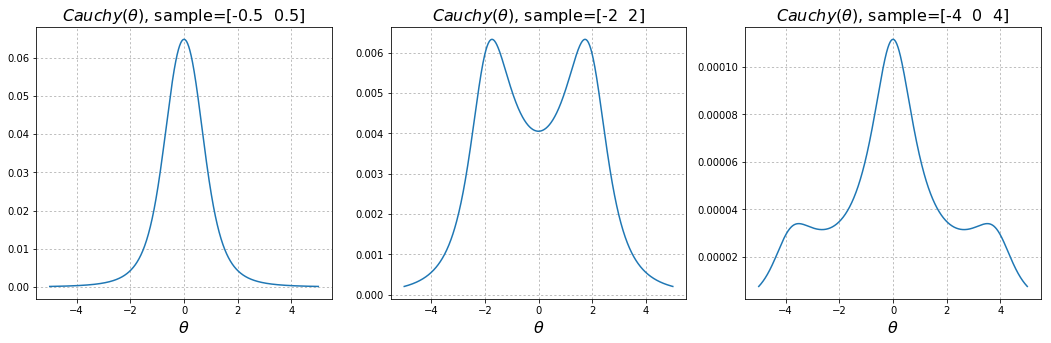

In [121]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
grid1 = np.linspace(1e-50,10,500)
grid_for_bin = np.linspace(0,1,200)
grid_for_pois = np.linspace(0,15,200)

draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')
draw_likelihood(sps.expon(scale = 1/grid1).pdf, grid1, 
                [[1, 2], [0.1, 1.0], [1, 10]], '$Exp(\\theta)$')
draw_likelihood(sps.uniform(scale = grid1).pdf, grid1,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')
draw_likelihood(sps.binom(5, grid_for_bin).pmf, grid_for_bin,
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')
draw_likelihood(sps.poisson(grid_for_pois).pmf, grid_for_pois,
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')
draw_likelihood(sps.cauchy(loc = grid).pdf, grid,
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Cauchy(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** По сути функция правдоподобия $f(\theta)$ = значению плотности $n$-мерного вектора, у которого компоненты независимы и имеют распределение Коши с параметром сдвига $\theta$, в точке $\overline{x}$(выборка). C точки зрения определения плотности, то функция правдоподобия ею не является, так $\int\limits_{-\infty}^{\infty}f(\theta)d\theta \neq 1$, что очевидно, если взглянуть на графики. Тем не менее к плотности, как мы уже выяснили, она имеет непосредственное отношение.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [122]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

In [123]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-142121.856514


**Вывод:** В данном примере значение функции правдоподобия имеет очень маленький порядок. Потому для сравнения значений удобнее пользоваться логарифмической функцией правдоподобия.

**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

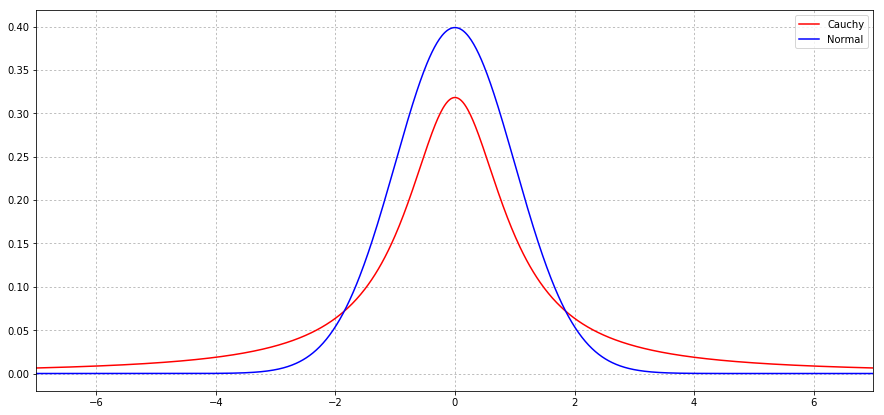

In [124]:
'''
Пункт a
'''
plt.figure(figsize = (15,7))
grid = np.linspace(-7, 7, 1000)
plt.plot(grid, sps.cauchy().pdf(grid), color = 'red', label = 'Cauchy')
plt.plot(grid, sps.norm.pdf(grid), color = 'blue', label = 'Normal')
plt.legend()
plt.xlim(-7, 7)
plt.grid(ls=':')
plt.show()

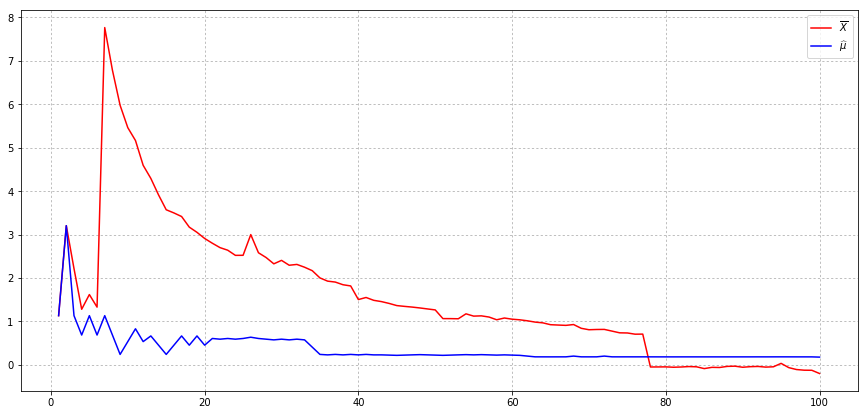

In [125]:
'''
Пункт b
'''
size = 100
sample = sps.cauchy().rvs(size)
Xmean = np.zeros(size)
Xmed = np.zeros(size)

for i in range(0,size):
    Xmean[i] = sample[:i+1].mean()
    Xmed[i] = np.median(sample[:i+1])

grid = np.arange(1,size + 1)    
plt.figure(figsize = (15,7))
plt.plot(grid, Xmean, color = "red", label = "$\\overline{X}$")
plt.plot(grid, Xmed, color = "blue", label = "$\\widehat{\mu}$")
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** Оценка $\widehat{\mu}$ значительно лучше $\theta$ параметр в данном диапазоне $n$.


**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [3]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

def likelihood(x,y,wind):
    return sps.weibull_min(c = x, scale = y).logpdf(wind).sum(axis = 0)

wind = [1,2,3,2,1,4,6,3,2,6,1,2,2,2,1,3,8,6,4,2,5,2,3,
        2,1,1,5,1,3,2,9,4,2,6,4,3,1,2,2,1,6,6,1,2,3,3,
        1,2,2,2,9,6,3,5,6,5,4,3,2,1,4,7,4,1,3,5,5,6,2,
        5,1,2,3,7,1,3,2,3,3,11,4,5,3,5,2,7,3,3,2,4,2,
        2,3,3,2,3,2,2,3,3,2,1,2,2,3,3,4,4,2,2,2,4,5]
'''
грубая оценка с точностью до 0,01
'''
grid = np.mgrid[1:10:1e-2, 1:10:1e-2]
wind1 = np.array([wind for i in range(0,900) for j in range(0,900)]).reshape(900,900,113).transpose()
print(cool_argmax(likelihood(grid[0],grid[1],wind1)))

(79, 269)


$c = 1,79$, $scale = 3,69$

In [12]:
wind = [1,2,3,2,1,4,6,3,2,6,1,2,2,2,1,3,8,6,4,2,5,2,3,
        2,1,1,5,1,3,2,9,4,2,6,4,3,1,2,2,1,6,6,1,2,3,3,
        1,2,2,2,9,6,3,5,6,5,4,3,2,1,4,7,4,1,3,5,5,6,2,
        5,1,2,3,7,1,3,2,3,3,11,4,5,3,5,2,7,3,3,2,4,2,
        2,3,3,2,3,2,2,3,3,2,1,2,2,3,3,4,4,2,2,2,4,5]
'''
точность 0.0001
'''
grid = np.mgrid[1.78:1.8:1e-4, 3.68:3.7:1e-4]
wind1 = np.array([wind for i in range(0,201) for j in range(0,201)]).reshape(201,201,113).transpose()
print(cool_argmax(likelihood(grid[0],grid[1],np.array(wind1))))

(150, 146)


$c = 1,7950$, $scale = 3,6946$

In [18]:
grid = np.mgrid[1.7949:1.7951:1e-5, 3.6945:3.6947:1e-5]
wind1 = np.array([wind for i in range(0,20) for j in range(0,20)]).reshape(20,20,113).transpose()
print(cool_argmax(likelihood(grid[0],grid[1],np.array(wind1))))

(11, 12)


$c = 1,79501$, $scale = 3,69482$

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

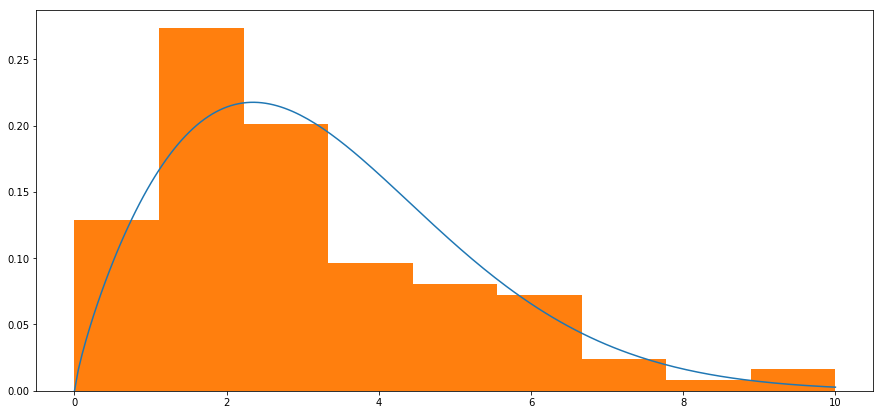

In [20]:
grid = np.linspace(0,10,200)
plt.figure(figsize = (15,7))
plt.plot(grid,sps.weibull_min(c = 1.79501, scale = 3.69482).pdf(grid))
plt.hist(wind, np.linspace(0,10,10), normed=True)
plt.show()

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

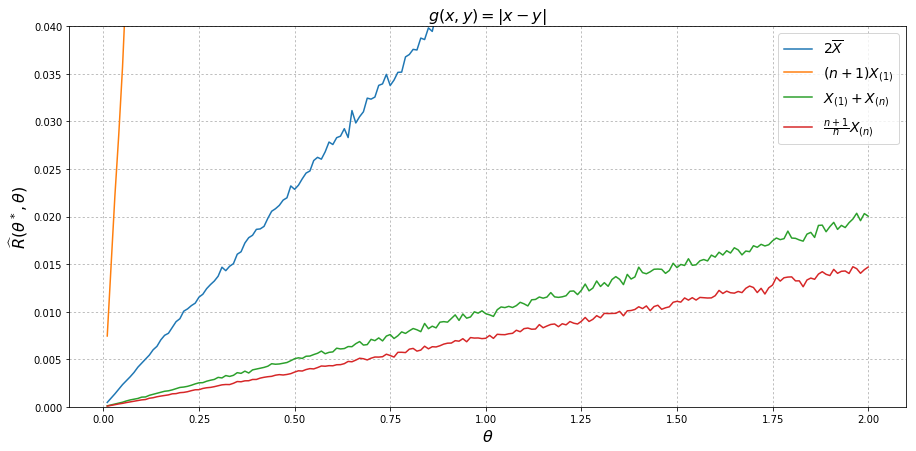

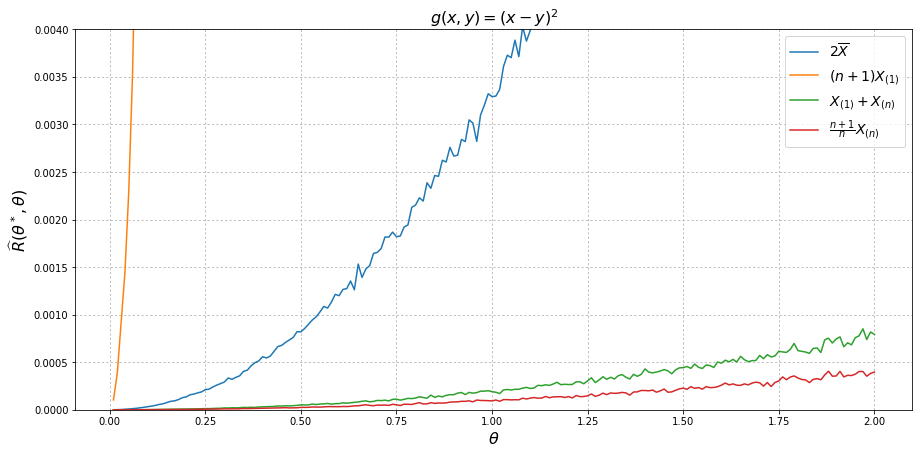

In [64]:
theta = np.linspace(0.01, 2, 200)
labels = ["$2 \overline{X}$","$(n+1)X_{(1)}$","$X_{(1)} + X_{(n)}$","$\\frac{n+1}{n}X_{(n)}$"]

def lin(x,y):
    return np.abs(x-y).mean()

def sqr(x,y):
    return ((x-y)**2).mean()

lin_g = [[],[],[],[]]
sqr_g = [[],[],[],[]]

for i in theta:
    sample = sps.uniform(scale = i).rvs((2000,100))
    t = [[],[],[],[]]
    t[0] = 2*sample.mean(axis = 1)
    t[1] = 101 * sample.min(axis = 1)
    t[2] = sample.min(axis = 1) + sample.max(axis = 1)
    t[3] = 1.01 * sample.max(axis = 1)
    
    for j in range(0,4):
        lin_g[j].append(lin(t[j],i))
        sqr_g[j].append(sqr(t[j],i))

plt.figure(figsize = (15,7))
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.title("$g(x,y) = |x-y|$", fontsize=16)
plt.ylim((0, 0.04))
for i in range(0,4):
    plt.plot(theta, np.array(lin_g[i]), label = labels[i])
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize = (15,7))
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.title("$g(x,y) = (x-y)^2$", fontsize=16)
plt.ylim((0, 0.004))
for i in range(0,4):
    plt.plot(theta, np.array(sqr_g[i]), label = labels[i])
plt.legend(fontsize=14)
plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:**
Графики показывают, что оценки $\frac{n+1}{n}X_{(n)}$ и $X_{(1)} + X_{(n)}$ заметно лучше остальных и в подходе с линейной функцией потерь, и в подходе с квадратичной функцией потерь. При этом $\frac{n+1}{n}X_{(n)}$ лучше, чем $X_{(1)} + X_{(n)}$.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

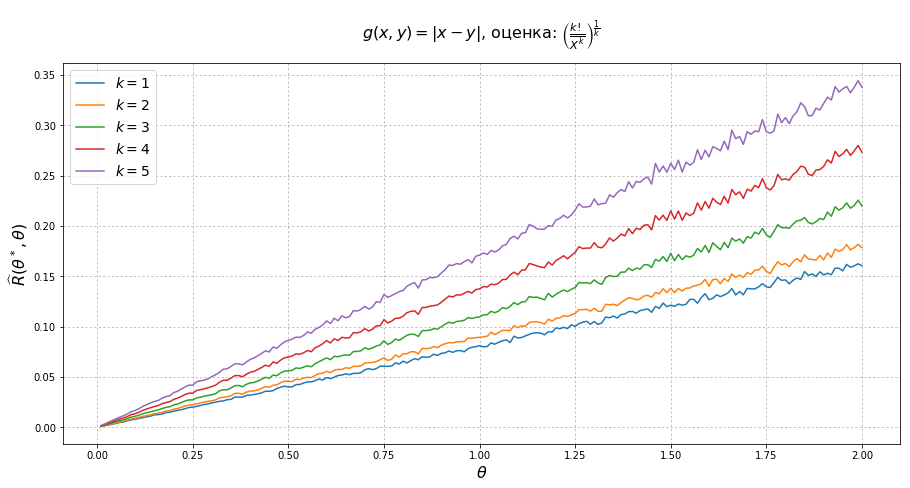

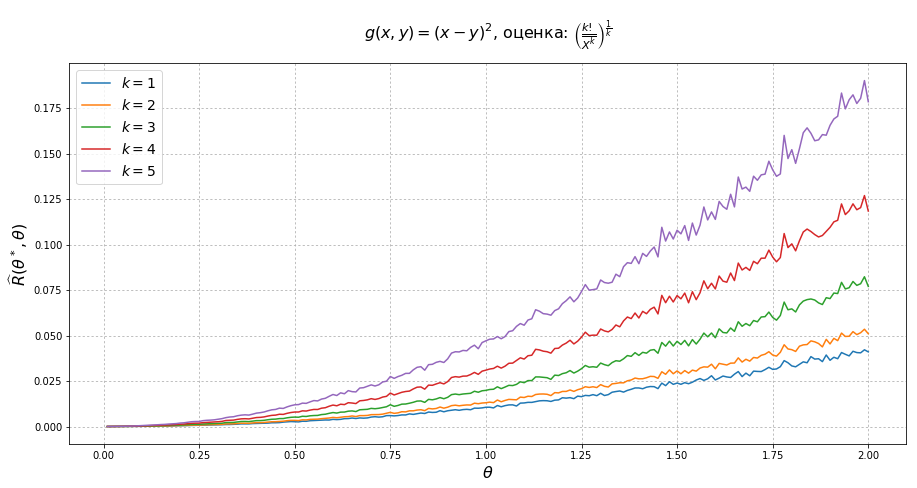

In [58]:
theta = np.linspace(0.01, 2, 200)
labels = ["$k = 1$","$k = 2$","$k = 3$","$k = 4$","$k = 5$"]

def lin(x,y):
    return np.abs(x-y).mean()

def sqr(x,y):
    return ((x-y)**2).mean()

lin_g = [[],[],[],[],[]]
sqr_g = [[],[],[],[],[]]

for i in theta:
    sample = sps.expon(scale = 1/i).rvs((2000,100))
    t = [[],[],[],[],[]]
    for j in range(0,5):
        t[j] = (scipy.special.gamma(j+2)/(sample**(j+1)).mean(axis = 1))**(1/(j+1))    
    for j in range(0,5):
        lin_g[j].append(lin(t[j],i))
        sqr_g[j].append(sqr(t[j],i))

plt.figure(figsize = (15,7))
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.title("$g(x,y) = |x-y|$, оценка: $\\left(\\frac{k!}{\overline{X^k}} \\right)^{\\frac{1}{k}}$\n", fontsize=16)
#plt.ylim((0, 0.4))
for i in range(0,5):
    plt.plot(theta, np.array(lin_g[i]), label = labels[i])
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize = (15,7))
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.title("$g(x,y) = (x-y)^2$, оценка: $\\left(\\frac{k!}{\overline{X^k}} \\right)^{\\frac{1}{k}}$\n", fontsize=16)
#plt.ylim((0, 0.2))
for i in range(0,5):
    plt.plot(theta, np.array(sqr_g[i]), label = labels[i])
plt.legend(fontsize=14)
plt.show()

**Вывод:** Оценка с $k = 1$ лучше остальных.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

...

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

...

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.